In [ ]:
#import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split   
import numpy as np  
import re
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from math import sqrt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# path to datasets
root_path = "/content/drive/My Drive/DS/"
all_files = os.listdir(root_path)
print((all_files[0]))

data0.csv


In [ ]:
# read all csv files

X = []
Y = []
for entry in all_files:
  each_file_path = root_path + entry
  with open(each_file_path) as f:
      tmp_list = []
      for i, line in enumerate(f):
        each_line = line.split()
        if i == 0:
          Y.append(int(re.search(r'\d+', each_line[0]).group()))
        else:  
          for j in each_line:
            tmp_condition = True
            if not j.isdigit():
              try:
                tmp_num = int(re.search(r'\d+', j).group()) 
              except:
                tmp_condition = False
            else:
              tmp_num = int(j)  
            if tmp_condition:
              tmp_list.append(tmp_num)
  
      X.append(tmp_list)
  
  # if cc == 5 :
  #   break      
print(X)
print(Y)  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# convert list to numpy array
X = np.array(X)
Y = np.array(Y)
print(X.shape,"   ",Y.shape)


(1000, 2500)     (1000,)


In [ ]:
# preprocessing 
mm_scaler = preprocessing.MinMaxScaler()
X_minmax = mm_scaler.fit_transform(main_x_array)
print(X_minmax[0].shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_minmax, main_y_array, test_size=0.3, random_state=42)

kf = KFold(n_splits=5)


(2500,)


In [ ]:
# ANN model
activationFunction='relu'
def ANN():
    model = Sequential()
    model.add(Dense(100, input_dim = X_train.shape[1], activation=activationFunction))
    model.add(Dense(75, activation=activationFunction))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(25, activation=activationFunction))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])
    return model

modelANN = ANN()

In [ ]:
# Function to display the results

def show_results(test, pred):
      mse=mean_squared_error(test, pred)
      rmse = sqrt(mse)
      print("RMSE: ", rmse)
      return rmse

In [ ]:
verbose, epochs, batch_size = 1, 10, 1

In [ ]:
# Applying 5-Fold Cross Validation, Training the Model and Storing the model to drive

for train_index, test_index in kf.split(X_train):
  x_train, x_val = X_train[train_index], X_train[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]
  history = modelANN.fit(x_train, y_train, 
                      validation_data = (x_val, y_val),                      
                      batch_size = batch_size, 
                      epochs = epochs)

modelANN.save('/content/drive/My Drive/1106924-ANN.h5') 

Train on 560 samples, validate on 140 samples
Epoch 1/10
560/560 [==============================] - 3s 5ms/step - loss: 7188.7347 - accuracy: 0.0054 - val_loss: 11698.4411 - val_accuracy: 0.0000e+00
Epoch 2/10
560/560 [==============================] - 3s 5ms/step - loss: 6613.3497 - accuracy: 0.0054 - val_loss: 4690.3191 - val_accuracy: 0.0071
Epoch 3/10
560/560 [==============================] - 3s 5ms/step - loss: 5702.2177 - accuracy: 0.0018 - val_loss: 5015.4148 - val_accuracy: 0.0000e+00
Epoch 4/10
560/560 [==============================] - 3s 5ms/step - loss: 5211.9377 - accuracy: 0.0054 - val_loss: 4767.8463 - val_accuracy: 0.0071
Epoch 5/10
560/560 [==============================] - 3s 5ms/step - loss: 4942.1536 - accuracy: 0.0089 - val_loss: 7419.0848 - val_accuracy: 0.0000e+00
Epoch 6/10
560/560 [==============================] - 3s 5ms/step - loss: 4448.6433 - accuracy: 0.0071 - val_loss: 17310.8348 - val_accuracy: 0.0000e+00
Epoch 7/10
560/560 [============================

In [ ]:
# load the model and check the results
saved_model_ANN = tf.keras.models.load_model('/content/drive/My Drive/1106924-ANN.h5')
Y_predict = saved_model_ANN.predict(X_test)
ann_result = show_results(Y_test, Y_predict)

RMSE:  92.47288556258033


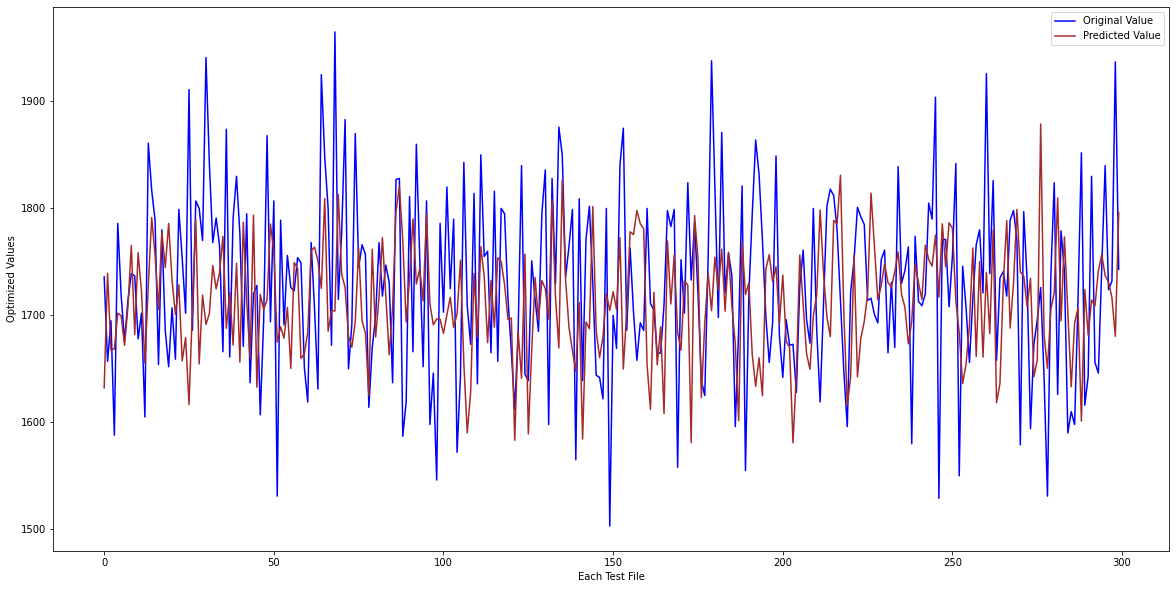

In [ ]:
# show the graph

import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='Original Value')
plt.plot(Y_predict, color='brown', label='Predicted Value')
plt.legend()
plt.ylabel("Optimized Values")
plt.xlabel("Each Test File")
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
from keras.utils import to_categorical

In [ ]:
# building CNN model

def CNN():
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size = 5, 
                     activation = activationFunction, 
                     input_shape = (2500, 1)))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(64, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(64, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())
    model.add(Dense(128, 
                    activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(64, 
                    activation=activationFunction))
    
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    return model

modelCNN = CNN()

In [ ]:
# set cnn parameters
cnn_epoch = 50
cnn_batch_size = 64

In [ ]:

X_train1 = np.expand_dims(X_train, axis=2)
X_test1 = np.expand_dims(X_test, axis=2)

X_train.shape

(700, 2500)

In [ ]:
X_train1.shape

(700, 2500, 1)

In [ ]:
# train and save the model
for train_index, test_index in kf.split(X_train1):
  x_train, x_val = X_train1[train_index], X_train1[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]

  history = modelCNN.fit(x_train, y_train, 
                      validation_data = (x_val, y_val),                      
                      epochs = cnn_epoch)

modelCNN.save('/content/drive/My Drive/1106924_CNN.h5') 

Train on 560 samples, validate on 140 samples
Epoch 1/50
560/560 [==============================] - 1s 3ms/step - loss: 21443.9061 - val_loss: 53100.4398
Epoch 2/50
560/560 [==============================] - 1s 2ms/step - loss: 21732.8004 - val_loss: 24593.0751
Epoch 3/50
560/560 [==============================] - 1s 2ms/step - loss: 26176.3719 - val_loss: 17807.8666
Epoch 4/50
560/560 [==============================] - 1s 2ms/step - loss: 19695.7243 - val_loss: 46593.4129
Epoch 5/50
560/560 [==============================] - 1s 2ms/step - loss: 21598.3598 - val_loss: 8520.2930
Epoch 6/50
560/560 [==============================] - 1s 2ms/step - loss: 20478.7705 - val_loss: 7444.8544
Epoch 7/50
560/560 [==============================] - 1s 2ms/step - loss: 22113.0559 - val_loss: 11503.7629
Epoch 8/50
560/560 [==============================] - 1s 2ms/step - loss: 22978.2335 - val_loss: 6994.0182
Epoch 9/50
560/560 [==============================] - 1s 2ms/step - loss: 21491.4115 - val_lo

In [ ]:
# load model and precdict the result
saved_model_CNN = tf.keras.models.load_model('/content/drive/My Drive/1106924_CNN.h5')

Y_predict = saved_model_CNN.predict(X_test1)
cnn_result = show_results(Y_test, Y_predict)

RMSE:  124.29973282218536


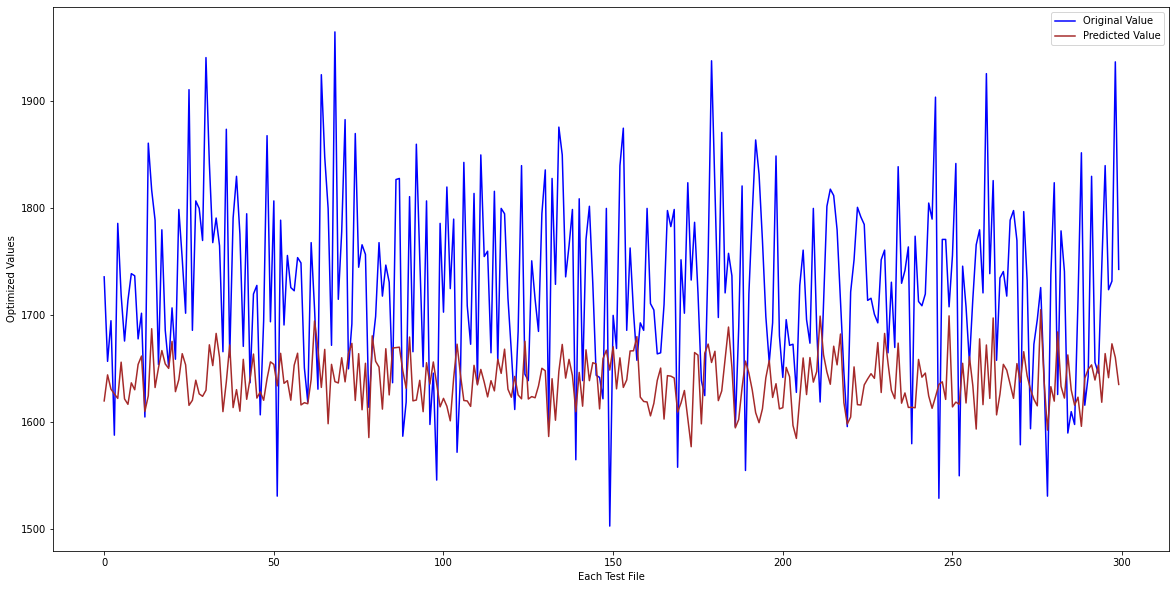

In [ ]:
# plot the graph
plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='Original Value')
plt.plot(Y_predict, color='brown', label='Predicted Value')
plt.legend()
plt.ylabel("Optimized Values")
plt.xlabel("Each Test File")
plt.show()

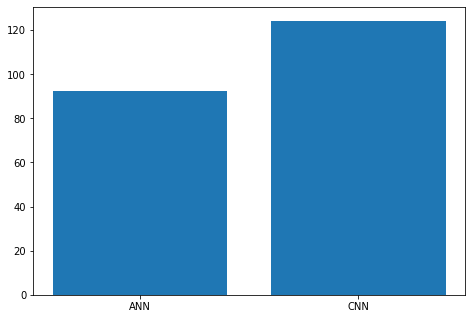

In [ ]:
# model comparison in terms of root means squared error
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['ANN', 'CNN']
results = [ann_result, cnn_result]
ax.bar(model, results)
plt.show()